# Chapter 03 Probability Mass Functions

In [2]:
%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt

from IPython.core import page
page.page = print

# Pmfs
Another way to represent a distribution is a **probability mass function** (PMF), which maps from each value to its probability. A **probability** is a frequency expressed as a fraction of the sample size, $n$. To get from frequencies to probabilities, we divide through by $n$, which is called **normalization**.

Again, I'll load the NSFG pregnancy file and select live births:

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

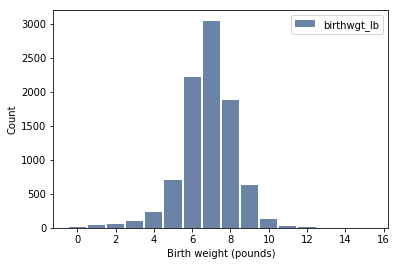

In [4]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Given a Hist, we can make a dictionary that maps from each value to its probability. To normalize the distribution, we could divide through by the total count:

In [5]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

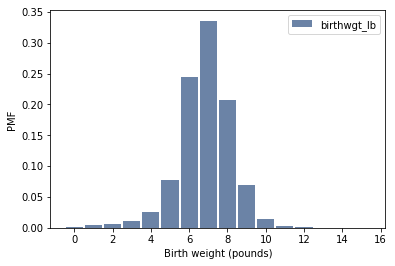

In [6]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

Or we can use the `Pmf` class provided by thinkstats2. Like `Hist`, the `Pmf` constructor can take a list, pandas Series, dictionary, Hist, or another Pmf object. Here’s an example with a simple list:

In [7]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

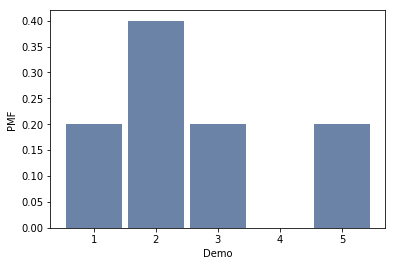

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Demo', ylabel='PMF')

The Pmf is normalized so total probability is 1.

`Pmf` and `Hist` objects are similar in many ways; in fact, they inherit many of their methods from a common parent class. For example, the methods `Values` and `Items` work the same way for both. 

The biggest difference is that a `Hist` maps from **values to integer counters**; a Pmf maps from **values to floating-point probabilities**.

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [9]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [10]:
pmf[2]

0.4

You can modify an existing `Pmf` by incrementing the probability associated with a value:

In [11]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

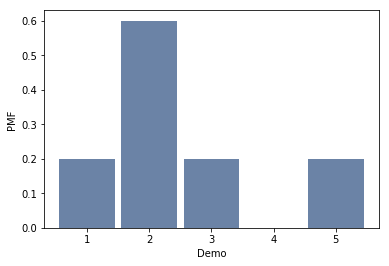

In [12]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Demo', ylabel='PMF')

The `Mult` method multiplies the probability associated with a value.

In [13]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

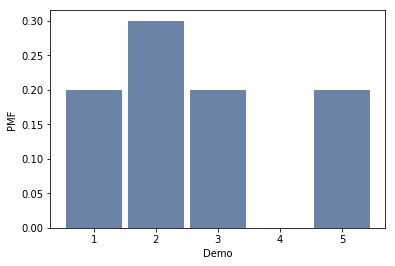

In [14]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Demo', ylabel='PMF')

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

If you modify a Pmf, the result may not be normalized; that is, the probabilities may no longer add up to 1. To check, you can call Total, which returns the sum of the probabilities:

In [15]:
pmf.Total()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [16]:
pmf.Normalize()
pmf.Total()

1.0

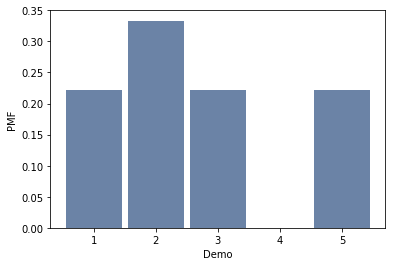

In [17]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Demo', ylabel='PMF')

`Pmf` objects provide a `Copy` method so you can make and modify a copy without affecting the original.

Our notation in this section might seem inconsistent, but there is a system: We use `Pmf` for the name of the class, pmf for an instance of the class, and PMF for the mathematical concept of a probability mass function.

# Plotting PMFs
thinkplot provides two ways to plot Pmfs:

* To plot a `Pmf` as a bar graph, you can use `thinkplot.Hist`. Bar graphs are most useful if the number of values in the Pmf is small.

* To plot a `Pmf` as a step function, you can use `thinkplot.Pmf`. This option is most useful if there are a large number of values and the Pmf is smooth. This function also works with `Hist` objects.

Here's the PMF of pregnancy length for live births.

In [18]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

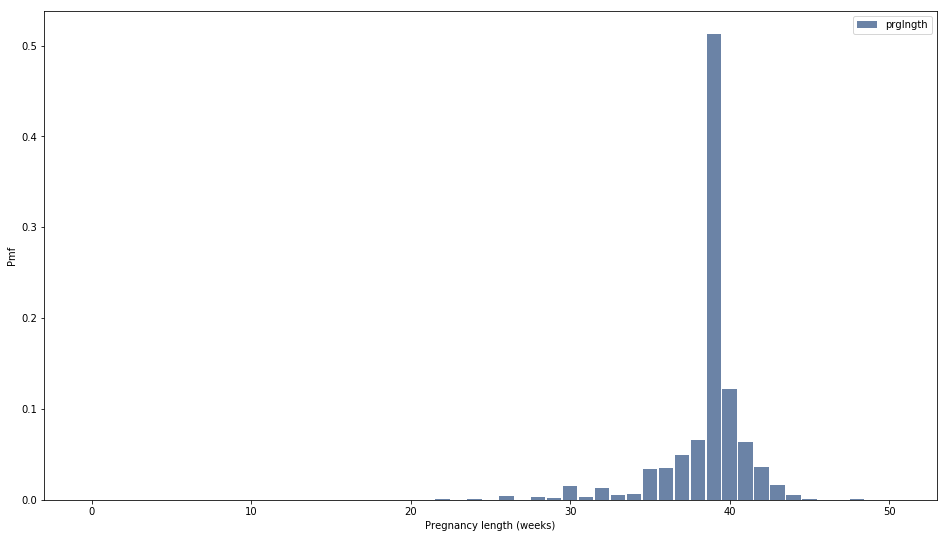

In [19]:
plt.figure(figsize=(16,9))
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

Here's what it looks like plotted with `Pmf`, which makes a step function.

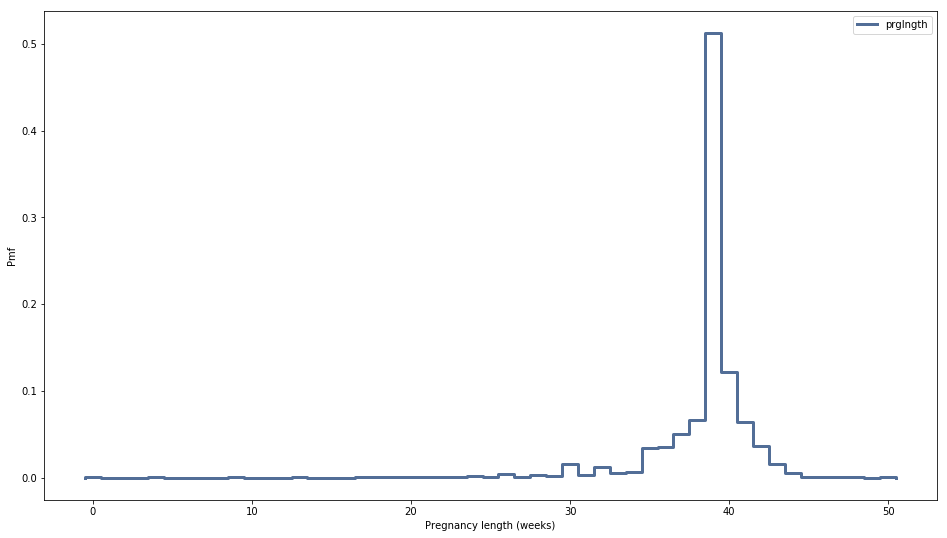

In [20]:
plt.figure(figsize=(16,9))
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [26]:
live, firsts, others = first.MakeFrames()
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [27]:
firsts.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125


In [28]:
others.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750


Here are the distributions of pregnancy length.

In [24]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

See 39, probability of first baby to arrive at week 39 is less than that of other babies.

See 41 and 42, the probability of first baby to arrive at 41 and 42 weeks are more than other babies.

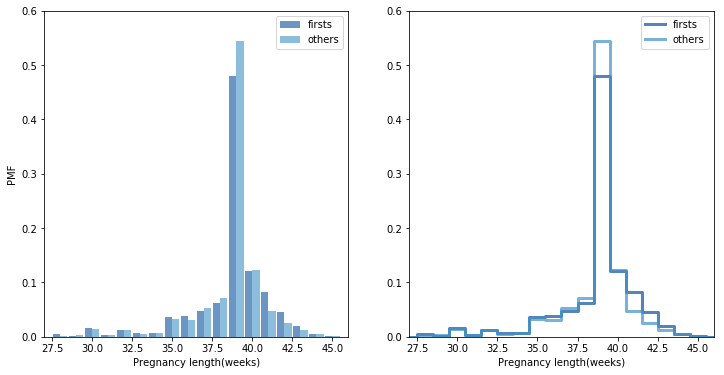

In [25]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2) # resets the color generator
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

By plotting the PMF instead of the histogram, we can compare the two distributions without being misled by the difference in sample size. This is because they will both be normalized between 0 and 1 and can be compared.

Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) and more likely to be late (weeks 41 and 42).

`PrePlot` takes optional parameters `rows` and `cols` to make a grid of figures, in this case one row of two figures. The figure on the left displays the `Pmfs` using `thinkplot.Hist`, as we have seen before.

The second call to `PrePlot` resets the color generator. Then `SubPlot` switches to the second figure (on the right) and displays the `Pmfs` using `thinkplot.Pmfs`. We used the axis option to ensure that the two figures are on the same axes, which is generally a good idea if you intend to compare two figures.

# Other Visualizations
Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

In the NSFG data, the biggest differences in the distributions are near the mode. So it makes sense to zoom in on that part of the graph, and transform the data to emphasize differences.

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

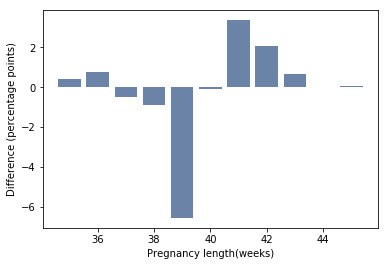

In [26]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


In this code, weeks is the range of weeks; `diffs` is the difference between the two PMFs in percentage points. Figure shows the result as a bar chart. This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

For now we should hold this conclusion only tentatively. We used the same dataset to identify an apparent difference and then chose a visualization that makes the difference apparent. We can’t be sure this effect is real; it might be due to random variation. We’ll address this concern later.

# The Class Size Paradox
Before we go on, we want to demonstrate one kind of computation you can do with Pmf objects; We call this example the “class size paradox.”

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10.

There are two reasons for the discrepancy:
* Students typically take 4–5 classes per semester, but professors often teach 1 or 2. Each stuent is exposed to more classes. Each teacher is exposed to less classes.
* The number of students who enjoy a small class is small, but the number of students in a large class is (ahem!) large.

The first effect is obvious, at least once it is pointed out; the second is more subtle. 

Let’s look at an example. Suppose that a college offers 65 classes in a given semester, with the following distribution of sizes:

| size | count |
|------|------|
| 5- 9 | 8 |
| 10-14 | 8 |
| 15-19 | 14 |
| 20-24 | 4 |
| 25-29 | 6 |
| 30-34 | 12 |
| 35-39 | 8 |
| 40-44 | 3 |
| 45-49 | 2 |


### Biasing and Unbiasing PMFs

If you ask the Dean for the average class size, he would construct a PMF, compute the mean, and report that the average class size is 23.7. Here’s the code:

There are 7 students each in 8 classes, 12 students each in 8 classes etc.

8 + 8 + 14 + 4 + 6 + 12 + 8 + 3 + 2 = 65

| Number of Students | Number of classes |
|------|------|
| 7 | 8 |
| 12 | 8 |
| 17 | 14 |
| 22 | 4 |
| 27 | 6 |
| 32 | 12 |
| 37 | 8 |
| 42 | 3 |
| 47 | 2 |

Note: Counts of classes are same for both tables. Number of Students lie in the size range.

In [27]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

print('mean', pmf.Mean())

mean 23.692307692307693


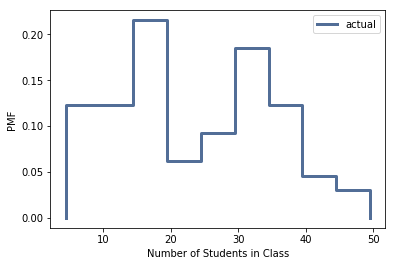

In [28]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of Students in Class', ylabel='PMF')

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class size was bigger.

Let’s see how much bigger.

First, we compute the distribution as observed by students, where the probability associated with each class size is “biased” by the number of students in the class.

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [29]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

For each class size, x, we multiply the probability by x, the number of students who observe that class size. The result is a new Pmf that represents the biased distribution.

The following graph shows the difference between the actual and observed distributions.

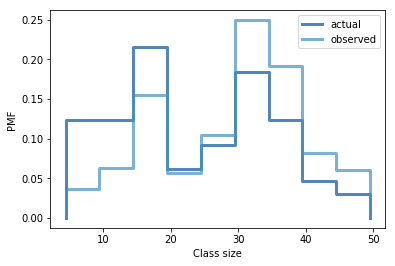

In [30]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In the biased distribution there are fewer small classes and more large ones (because more students go to larget classes - thats why they are large). The mean of the biased distribution is 29.1, almost 23% higher than the actual mean.

The observed mean is substantially higher than the actual.

In [31]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


In [32]:
(biased_pmf.Mean() - pmf.Mean()) / pmf.Mean() * 100

22.92334289087536

If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

It is also possible to invert this operation. Suppose you want to find the distribution of class sizes at a college, but you can’t get reliable data from the Dean. 

An alternative is to choose a random sample of students and ask how many students are in their classes. The result would be biased for the reasons we’ve just seen, but you can use it to estimate the actual distribution. Here’s the function that unbiases a Pmf:

In [33]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

It’s similar to BiasPmf; the only difference is that it divides each probability by x instead of multiplying.

We can unbias the same biased PMF from above:

In [34]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same. Note, they are same because there is an exact overlap.

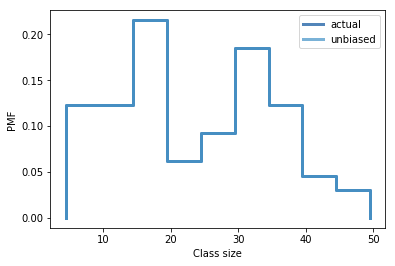

In [35]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

## Siblings Exercise

Ground Truth, as observed by asking parents:

| # of Siblings | # of Couples |
|------|------|
| 0 | 3 |
| 1 | 10 |
| 2 | 30 |
| 3 | 5 |
| 4 | 2 |

Ground Likelyhoods, as observed by asking siblings:

* 0*3 siblings observed 3 couples
* 1*10 siblings observed 10 couples
* 2*30 siblings observed 30 couples
* 3*5 siblings observed 5 couples
* 4*2 siblings observed 2 couples

In [36]:
number_siblings = { 0: 3, 1 : 10, 2 : 30, 3 : 5, 4 : 2}

pmf_siblings = thinkstats2.Pmf(number_siblings, label='actual siblings')

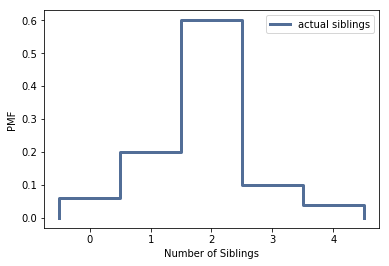

In [37]:
thinkplot.Pmf(pmf_siblings)
thinkplot.Config(xlabel='Number of Siblings', ylabel='PMF')

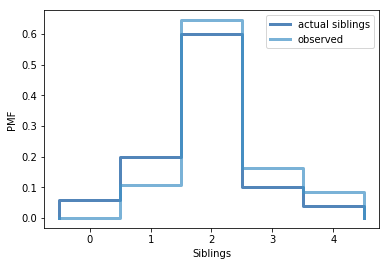

In [38]:
biased_sibling_pmf = BiasPmf(pmf_siblings, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_siblings, biased_sibling_pmf])
thinkplot.Config(xlabel='Siblings', ylabel='PMF')

In [39]:
print('Actual mean', pmf_siblings.Mean())
print('Observed mean', biased_sibling_pmf.Mean())

Actual mean 1.8599999999999999
Observed mean 2.2258064516129035


In [40]:
(biased_sibling_pmf.Mean() - pmf_siblings.Mean()) / pmf_siblings.Mean() * 100

19.667013527575463

In [41]:
unbiased_sibling = UnbiasPmf(biased_sibling_pmf, label='unbiased siblings')
print('Unbiased mean', unbiased_sibling.Mean())

ZeroDivisionError: division by zero

## Method 2

In [42]:
number_siblings = { 0: 3, 1 : 10, 2 : 30, 3 : 5, 4 : 2}

pmf_siblings = thinkstats2.Pmf(number_siblings, label='actual siblings')

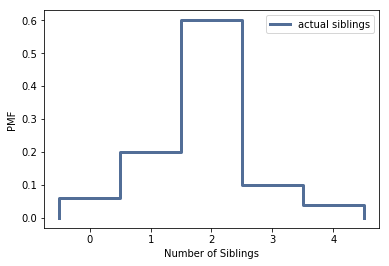

In [43]:
thinkplot.Pmf(pmf_siblings)
thinkplot.Config(xlabel='Number of Siblings', ylabel='PMF')

In [44]:
biased_sibling_pmf = pmf_siblings.Copy()
biased_sibling_pmf[0] = 0

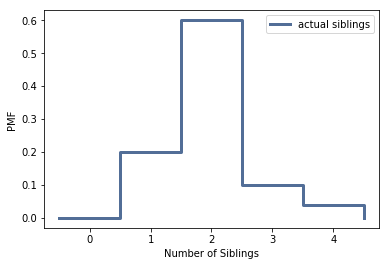

In [45]:
thinkplot.Pmf(biased_sibling_pmf)
thinkplot.Config(xlabel='Number of Siblings', ylabel='PMF')

In [46]:
biased_sibling_pmf.Normalize()

0.9400000000000001

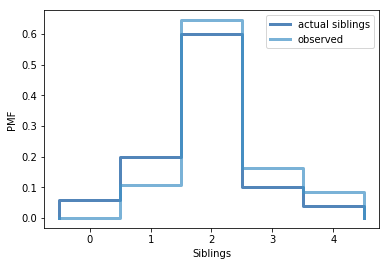

In [47]:
biased_sibling_pmf = BiasPmf(pmf_siblings, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_siblings, biased_sibling_pmf])
thinkplot.Config(xlabel='Siblings', ylabel='PMF')

# Pandas indexing

Now let’s look at row selection. To start, we create a NumPy array of random numbers and use it to initialize a DataFrame:

Here's an example of a small DataFrame.

In [48]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-0.104222,0.152897
1,-0.161809,-0.319202
2,0.706398,-1.076315
3,-1.817538,1.783982


By default, the rows and columns are numbered starting at zero, but you can provide column names:

In [49]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-0.104222,0.152897
1,-0.161809,-0.319202
2,0.706398,-1.076315
3,-1.817538,1.783982


You can also provide row names. The set of row names is called the **index**; the row names themselves are called **labels**.

In [50]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.104222,0.152897
b,-0.161809,-0.319202
c,0.706398,-1.076315
d,-1.817538,1.783982


Normal indexing selects columns.

In [51]:
df['A']

a   -0.104222
b   -0.161809
c    0.706398
d   -1.817538
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [52]:
df.loc['a']

A   -0.104222
B    0.152897
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [53]:
df.iloc[0]

A   -0.104222
B    0.152897
Name: a, dtype: float64

`loc` can also take a list of labels.

In [54]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-0.104222,0.152897
c,0.706398,-1.076315


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [55]:
df['a':'c']

,A,B
a,-0.104222,0.152897
b,-0.161809,-0.319202
c,0.706398,-1.076315


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [56]:
df[0:2]

,A,B
a,-0.104222,0.152897
b,-0.161809,-0.319202


But notice that one method includes the last elements of the slice and one does not.

In general, we recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

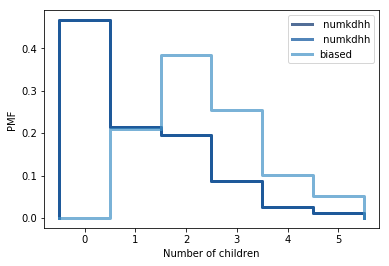

In [57]:
resp = nsfg.ReadFemResp()

pmf = thinkstats2.Pmf(resp.numkdhh , label = " numkdhh")

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="No. of Students",ylabel="Pmf")

biased = BiasPmf(pmf, label='biased')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [59]:
pmf.Mean()

1.024205155043831

In [60]:
biased.Mean()

2.403679100664282

**Exercise:** We started this book with the question, *"Are first babies more likely to be late?"* To address it, we computed the difference in means between groups of babies, but we ignored the possibility that there might be a difference between first babies and others for the same woman.

For the same woman, the first baby may arrive in 39 weeks, the second baby may arrive in 40 weeks. 

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

So we are taking all the women who gave given more than 2 live births, taking the gestation period for the first two babies and calculate the difference. 

This way we are computing each women to herself, not to some other women.

For example, women one had the following two gestation periods 39,39. Both her babies arrived at the same time.
For women two, the period are 42 and 42. Both her babies also arrived at the same time. 

But if we compare the first baby of woman one with the first baby of woman two, we may conclude that first babies arrive early, since woman one's first baby arrived at week 39.

But if we compare the women to themselves, the first and second baby arrived at the same time and first baby was never late.

Hint: use `nsfg.MakePregMap`:

In [61]:
live, firsts, others = first.MakeFrames()

In [62]:
preg_map = nsfg.MakePregMap(live)

In [63]:
hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

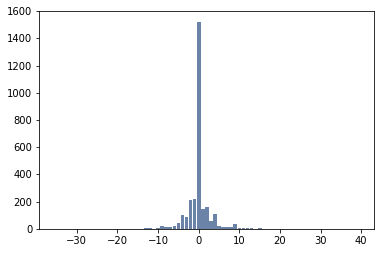

In [64]:
thinkplot.Hist(hist)

In [65]:
pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location (because they all did not start together). When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race (different start locations and different abilities).

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.